In [5]:
import MEArecTemplate as mr
import numpy as np
import matplotlib.pyplot as plt
import MEAutility as mu
import LFPy
from matplotlib.collections import LineCollection
from neuron import h
import os
import inspect
from pathlib import Path
import shutil
import plotly
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%run ZIAD_MEARecHelperFunctions.ipynb

### Load apical dendrite info for each cell from template into new file

In [7]:
# Load template
#templates_file = 'ziad_mearec_templates/mag_templates_flattened_5-25bound_2-4cells_n300_100MEA75.h5'
mea_name = '400MEA50'
templates_file = f'ziad_mearec_templates/mag_templates_flattened_morphology_L5_TTPC1_cADpyr232_1_n300_{mea_name}.h5'
tempgen = mr.tools.load_templates(templates_file, verbose=False)

# Get cell information
mea_cells_folder = '/Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/'
cell_name = 'L5_TTPC1_cADpyr232_1'
cell_model_folder = Path(Path(mea_cells_folder) / cell_name)

all_y = []
all_z = []

for k in range(len(tempgen.locations)):
    # Load cell
    cell = mr.return_bbp_cell(cell_model_folder, end_T=1000, dt=0.03125, start_T=0)
    
    # Flatten cell appropriately and move to defined location
    pos = tempgen.locations[k]
    rot = tempgen.rotations[k]

    cell = mr.ziad_flatten_geometry(cell, pos, rot, 10)
    cell.set_pos(pos[0], pos[1], pos[2])
    cell.set_rotation(rot[0], rot[1], rot[2])

    # Get coordinates of apical dendrite
    ycoords, zcoords = get_apical_coords(cell, cell_name)

    # Store in new array and save
    all_y.append(ycoords)
    all_z.append(zcoords)
    
with open(f'mag_templates_flattened_morphology_L5_TTPC1_cADpyr232_1_n300_{mea_name}.npy', 'wb') as f:
    np.save(f, np.array(all_y))
    np.save(f, np.array(all_z))
    np.save(f, tempgen.mags[:, :, 0, :])

numprocs=1
Setting temperature to 34.000000 C
Setting simulation time step to 0.025000 ms
	1 
	1 
	1 
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  14.17022005  177.91202845 -403.65764233]
Ziad Faltten Rotation:  [1.89961158 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  14.17304802   47.39203647 -290.38754708]
Ziad Faltten Rotation:  [1.24470837 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C06

Ziad Flatten Position:  [ 13.2436246  301.13481894 278.35300814]
Ziad Faltten Rotation:  [3.38312202 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [ 10.98743402 122.17824837 164.33996793]
Ziad Faltten Rotation:  [3.83425611 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  17.99615262 -375.83373995  218.21777815]
Ziad Faltten Rotation:  [4.59758639 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models

Ziad Flatten Position:  [  16.6873277   -18.66751568 -393.14239178]
Ziad Faltten Rotation:  [2.21800265 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [ 14.92071801 185.79865296 -25.33261323]
Ziad Faltten Rotation:  [2.87395985 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  17.54891457  -29.1848395  -302.95579644]
Ziad Faltten Rotation:  [1.96350407 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_mod

Ziad Flatten Position:  [  18.88386434 -254.85956279   68.91888059]
Ziad Faltten Rotation:  [5.64358875 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [ 16.31646627 167.40815667  91.72287081]
Ziad Faltten Rotation:  [4.07346918 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  11.69940714 -283.07170986   11.44634765]
Ziad Faltten Rotation:  [5.49987773 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_mod

Ziad Flatten Position:  [ 10.59177207 202.13112654 361.92916979]
Ziad Faltten Rotation:  [3.3594876 0.        0.       ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  11.92556021  204.23767635 -397.83993227]
Ziad Faltten Rotation:  [2.06249393 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [ 19.17606348  71.35662131 286.81615425]
Ziad Faltten Rotation:  [3.79926655 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/ME

Ziad Flatten Position:  [  18.73323134 -206.20799193  104.65842505]
Ziad Faltten Rotation:  [0.21633802 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  12.52841482 -222.99139121 -365.36339266]
Ziad Faltten Rotation:  [0.06391543 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  12.87043946 -296.18525565  352.94241073]
Ziad Faltten Rotation:  [5.05693276 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_

Ziad Flatten Position:  [ 10.32643866 181.82207701  52.93504507]
Ziad Faltten Rotation:  [3.09399154 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  12.59218126 -139.83422197 -202.30926809]
Ziad Faltten Rotation:  [1.37770091 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [ 15.33649076 193.30563828  12.43040721]
Ziad Faltten Rotation:  [2.51293435 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models

Ziad Flatten Position:  [  19.4605503  -242.09975192  248.19745058]
Ziad Faltten Rotation:  [6.09178699 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  11.93558958 -311.72264762 -281.63344865]
Ziad Faltten Rotation:  [0.32981045 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [ 19.41886246 298.70294941 164.72959486]
Ziad Faltten Rotation:  [2.95497529 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_mod

Ziad Flatten Position:  [ 14.97564385 259.35039915 174.89484779]
Ziad Faltten Rotation:  [4.43329248 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [ 10.04872048 136.59492172 298.98329375]
Ziad Faltten Rotation:  [3.43670324 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  15.43164048   93.44868736 -159.73843841]
Ziad Faltten Rotation:  [2.304245 0.       0.      ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEAre

Ziad Flatten Position:  [  13.62216106  248.05638973 -374.69536862]
Ziad Faltten Rotation:  [2.25186374 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  14.55872807  123.75029738 -262.98568145]
Ziad Faltten Rotation:  [1.0475448 0.        0.       ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [14.12278928 90.07186031 37.81882307]
Ziad Faltten Rotation:  [2.44588662 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/ME

Ziad Flatten Position:  [ 17.36647205 249.79040997 -83.77056092]
Ziad Faltten Rotation:  [2.81452759 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  11.78913336 -219.70507496  174.40905618]
Ziad Faltten Rotation:  [4.69594422 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  16.03179554  304.66955961 -200.26770185]
Ziad Faltten Rotation:  [2.13306221 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_mod

Ziad Flatten Position:  [  17.77820611  347.2089601  -250.28502583]
Ziad Faltten Rotation:  [1.86022051 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [ 13.89238755  26.97332404 374.06756367]
Ziad Faltten Rotation:  [4.76927702 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [ 10.21685405 218.9555091  -92.93587764]
Ziad Faltten Rotation:  [3.58971666 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models

Ziad Flatten Position:  [  15.87098135 -359.21469135 -290.0071675 ]
Ziad Faltten Rotation:  [0.60543864 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  15.99714366 -396.06282916  -68.11988804]
Ziad Faltten Rotation:  [0.1410057 0.        0.       ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [ 12.04735086 106.74534305 110.49505009]
Ziad Faltten Rotation:  [4.35058748 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models

Ziad Flatten Position:  [  16.07376539 -171.61565408  402.39077585]
Ziad Faltten Rotation:  [5.11768967 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  11.71610694 -165.67073353 -328.05763407]
Ziad Faltten Rotation:  [1.99793375 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  14.22126568  333.95752198 -186.07463268]
Ziad Faltten Rotation:  [2.21195394 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_

Ziad Flatten Position:  [  19.90584593 -174.26247619 -269.99596124]
Ziad Faltten Rotation:  [1.38591683 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  17.9288793  -192.38603201 -403.42830811]
Ziad Faltten Rotation:  [1.45341963 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  16.86936898  113.64978672 -346.78207275]
Ziad Faltten Rotation:  [1.52658857 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_

In [12]:
# PLOT CELL TEMPLATE
templates_file = 'ziad_mearec_templates/mag_templates_flattened_morphology_L5_TTPC1_cADpyr232_1_n300_400MEA75.h5'
tempgen = mr.tools.load_templates(templates_file, verbose=False)

# Which cell type (calculate based on ID of template and number of iterations per cell type)
mea_cells_folder = '/Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/'
cell_name = 'L5_TTPC1_cADpyr232_1'
cell_model_folder = Path(Path(mea_cells_folder) / cell_name)

In [14]:
dir(tempgen)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_verbose',
 'celltypes',
 'generate_templates',
 'info',
 'locations',
 'mags',
 'params',
 'rotations',
 'templates']

Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  14.17304802   71.0880547  -435.58132063]
Ziad Faltten Rotation:  [1.24470837 0.         0.        ]
Real morph


/var/folders/df/rk7rf_5s4253kn_8sb19p5x80000gn/T/ipykernel_89426/2804746349.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.plot(electrodes.y, electrodes.z, '.', marker='o', markersize=3, color='k', zorder=0)


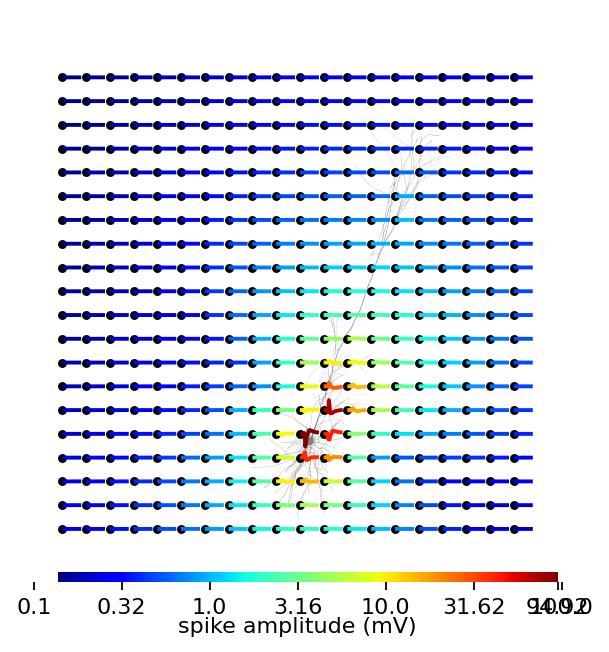

In [19]:
template_id = 2

# Load cell and position and rotation info
T = 1000
dt = 0.03125
cell = mr.return_bbp_cell(cell_model_folder, end_T=T, dt=dt, start_T=0)

pos = tempgen.locations[template_id]
rot = tempgen.rotations[template_id]

cell = mr.ziad_flatten_geometry(cell, pos, rot, 10)
cell.set_pos(pos[0], pos[1], pos[2])
cell.set_rotation(rot[0], rot[1], rot[2])

mea_name = '400MEA75'
mea = mu.return_mea(mea_name)
electrodes = LFPy.RecExtElectrode(cell, probe=mea)

real_morph = True
scale_mult = 40
time_scale = 8
t = np.arange(0, 7, dt)
dim=0
    
fig = plotstuff2(cell, t, tempgen.templates[template_id], electrodes, 0, False, real_morph, scale_mult, time_scale)
# fig = plotstuff2(cell, t, tempgen.mags[template_id, :, 0, :] + generate_noise(20, mags[template_id], np.shape(mags[template_id])), electrodes, 0, False, real_morph, scale_mult, time_scale)


/var/folders/df/rk7rf_5s4253kn_8sb19p5x80000gn/T/ipykernel_89426/162401176.py:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax.plot([lim, lim, -lim, -lim], [lim, -lim, lim, -lim], '.', marker='o', markersize=1, color='blue')


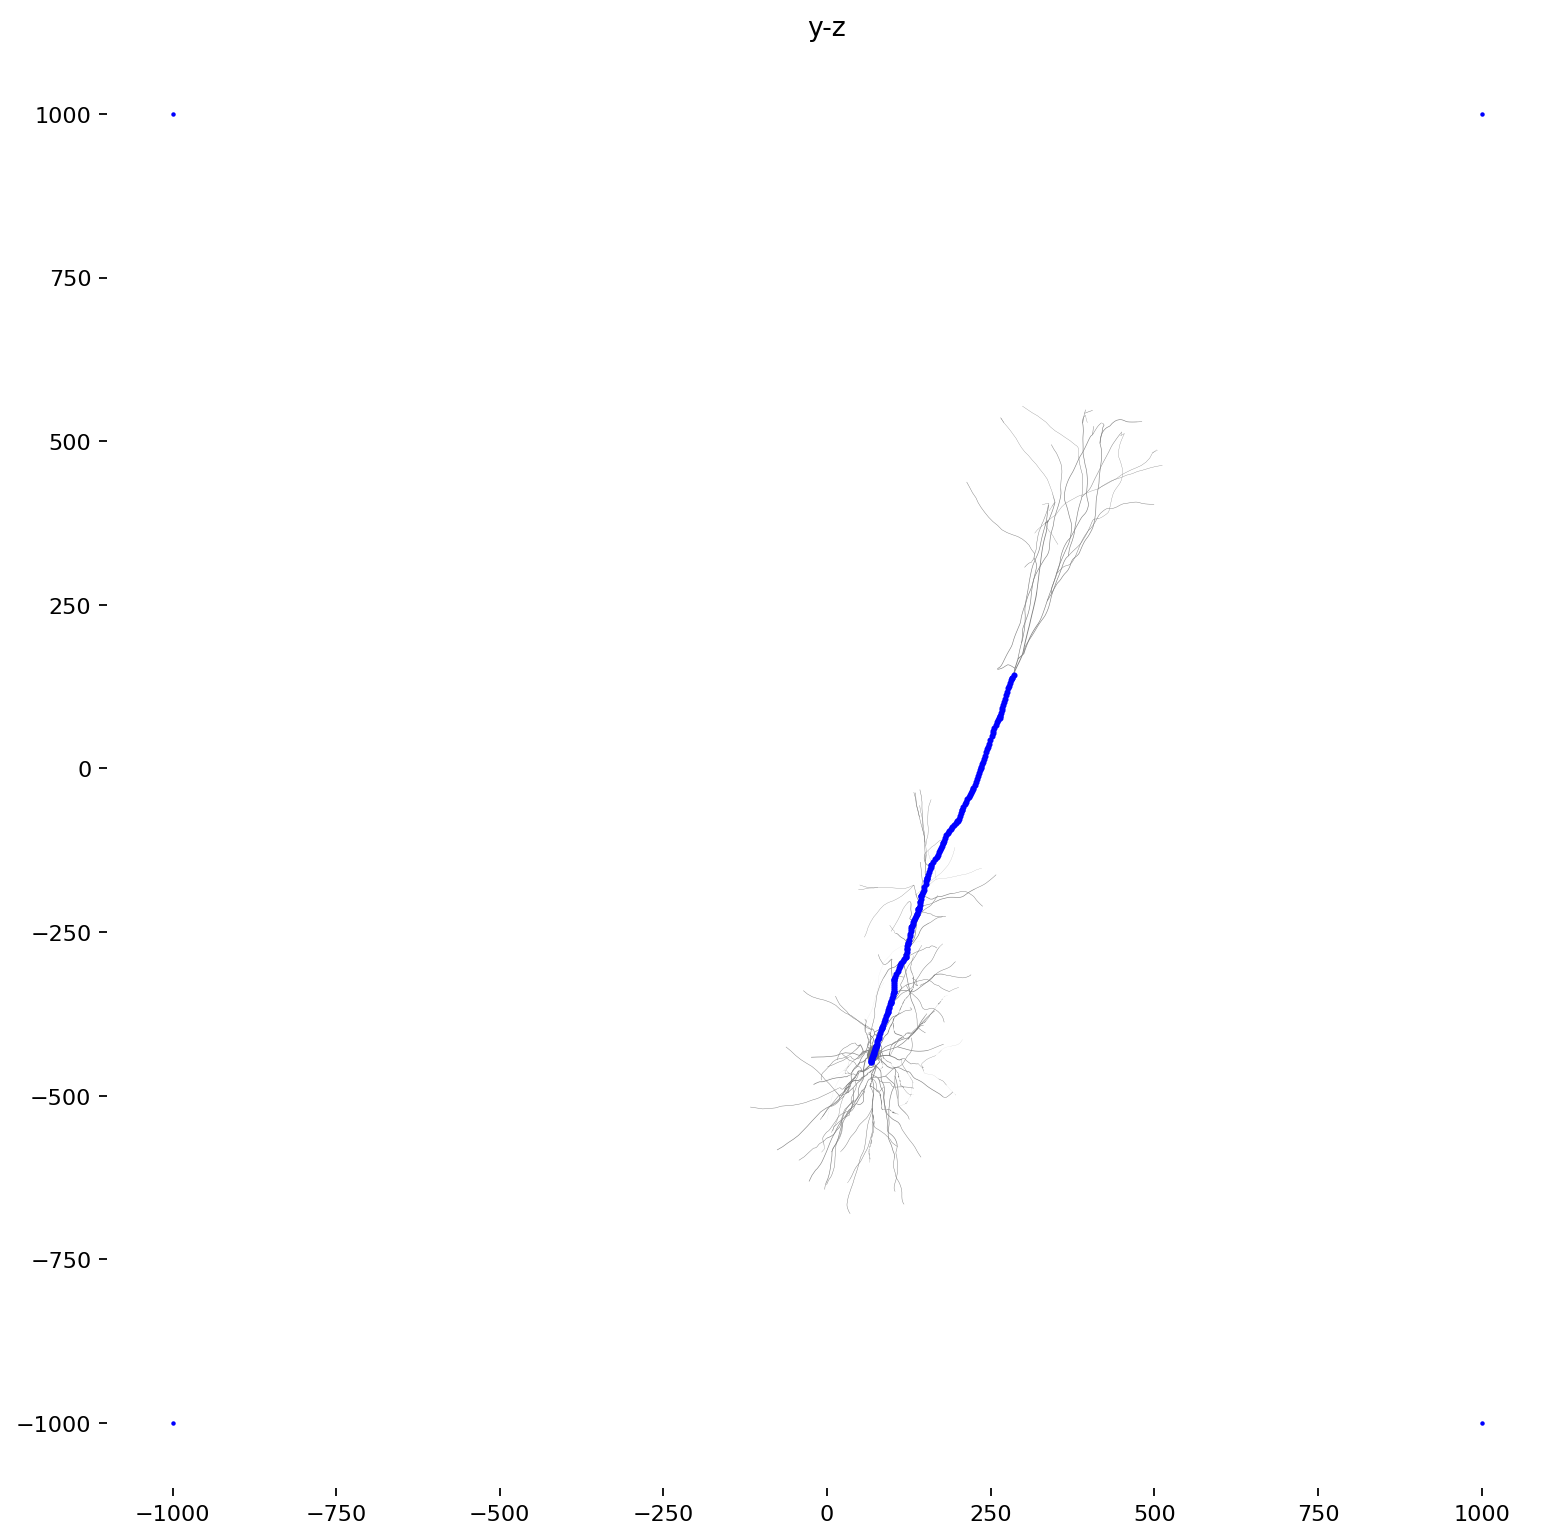

In [20]:
plotcell_1plane(cell, 1000, 1000)
ycoords, zcoords = get_apical_coords(cell, cell_name)
plt.scatter(ycoords, zcoords, s=3, color='blue')

### Run SVM for Morphology Reconstruction

In [21]:
from sklearn import svm, datasets
from scipy.spatial import distance

In [22]:
# Get all signals from the grid of electrodes that exceed a certain threshold
def get_strong_signals(data, electrodes, thresh):
    data = data/np.max(abs(data))
    
    coords = []
    targets = []
    for i in range(len(data)):
        if np.max(abs(data[i])) >= thresh:
            coords.append([electrodes.y[i], electrodes.z[i]])
            
            # Target is 1 if signal is positive, 0 if negative
            targets.append(np.max(data[i]) > abs(np.min(data[i])))
            
    return np.array(coords), np.array(targets)

def get_electrodes(mea_name):
    mea_cells_folder = '/Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/'
    cell_name = 'L5_TTPC1_cADpyr232_1'
    cell_model_folder = Path(Path(mea_cells_folder) / cell_name)
    
    cell = mr.return_bbp_cell(cell_model_folder, end_T=1000, dt=0.03125, start_T=0)
    mea = mu.return_mea(mea_name)
    electrodes = LFPy.RecExtElectrode(cell, probe=mea)
    
    return electrodes

def make_meshgrid(x, y, h=.5):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def load_cell(template_id, tempgen):
    # Load cell and position and rotation info
    mea_cells_folder = '/Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/'
    cell_name = 'L5_TTPC1_cADpyr232_1'
    cell_model_folder = Path(Path(mea_cells_folder) / cell_name)
    
    T = 1000
    dt = 0.03125
    cell = mr.return_bbp_cell(cell_model_folder, end_T=T, dt=dt, start_T=0)

    pos = tempgen.locations[template_id]
    rot = tempgen.rotations[template_id]

    cell = mr.ziad_flatten_geometry(cell, pos, rot, 10)
    cell.set_pos(pos[0], pos[1], pos[2])
    cell.set_rotation(rot[0], rot[1], rot[2])

    return cell

def get_apic_dist(template_id, all_y, all_z, clf, verbose=False):
    coords = np.zeros((2, np.shape(all_y)[1]))
    coords[0] = all_y[template_id]
    coords[1] = all_z[template_id]
    dists = abs(clf.decision_function(coords.T))/np.linalg.norm(clf.coef_)
    if verbose:
        print(dists)
    
    return np.mean(dists), np.std(dists)

def get_apic_dist_real(template_id, all_y, all_z, xx, yy, clf, boundary = [], verbose=False):
    coords = np.zeros((np.shape(all_y)[1], 2))
    coords[:, 0] = all_y[template_id]
    coords[:, 1] = all_z[template_id]
    
    if len(boundary) == 0:
        dists = distance.cdist(coords, get_boundary_coords(xx, yy, clf), 'euclidean')
    else:
        dists = distance.cdist(coords, boundary, 'euclidean')
        
    dists = np.min(dists, axis=1)
    if verbose:
        print(dists)
        plt.hist(dists, bins=30)
        
    return np.mean(dists), np.std(dists)

def get_boundary_coords(xx, yy, clf):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    boundary = []
    for i in range(len(xx)):
        for j in range(1, len(xx[0])):
            if j > 0:
                if Z[i, j] != Z[i, j-1]:
                    #print("hit1")
                    midx = (xx[i, j] + xx[i, j-1]) / 2
                    midy = yy[i, j]
                    boundary.append([midx, midy])
            if i > 0:
                if Z[i, j] != Z[i-1, j]:
                    #print("hit2")
                    midx = xx[i, j]
                    midy = (yy[i, j] + yy[i-1, j]) / 2
                    boundary.append([midx, midy])
    #print(boundary)
    boundary = np.array(boundary)
    return boundary

def generate_noise(snr, sig, shape):
    noise = np.random.normal(size=shape)
    
    sig_pwr = np.sum(sig**2)
    noise_pwr = sig_pwr/(10**(snr/10))
    noise_coeff = np.sqrt(noise_pwr/np.sum(noise**2))
    noise = noise*noise_coeff
    
    new_noise_pwr = np.sum(noise**2)
    
    print("SNR: ", 10*np.log10(sig_pwr/noise_pwr))
    return noise

In [23]:
# Load template
templates_file = 'ziad_mearec_templates/mag_templates_flattened_morphology_L5_TTPC1_cADpyr232_1_n300_400MEA75.h5'
tempgen = mr.tools.load_templates(templates_file, verbose=False)

with open('mag_templates_flattened_morphology_L5_TTPC1_cADpyr232_1_n300_400MEA75.npy', 'rb') as f:
    all_y = np.load(f)
    all_z = np.load(f)
    mags = np.load(f)

# Save coordinates with positive/negative data that exceed some threshold
plot = False
thresh = 0
elecs = get_electrodes('400MEA75')

template_id = 0
cell = load_cell(template_id, tempgen)

snr = 40
noise = generate_noise(snr, mags[template_id], np.shape(mags[template_id]))
sig = mags[template_id] + noise
coords, targets = get_strong_signals(sig, elecs, thresh)

if plot:
    plt.scatter(coords.T[0], coords.T[1])
    plt.xlim([np.min(electrodes.y)-20, np.max(electrodes.y)+20])
    plt.ylim([np.min(electrodes.z)-20, np.max(electrodes.z)+20])

# Do SVM
model = svm.SVC(kernel="rbf")
clf = model.fit(coords, targets)

# Learn what best parameters are for SVM by matching to apical dendrite coordinates

Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  14.17022005  266.86804268 -605.4864635 ]
Ziad Faltten Rotation:  [1.89961158 0.         0.        ]
SNR:  40.0


[ 4.04168277  4.41518594  4.62721536  4.87976582  5.2397845   5.40962704
  5.59791328  5.97949165  6.2087263   6.41047533  6.62626803  7.01879689
  7.22744849  7.40463869  7.59535451  7.79855096  7.99320068  8.17683866
  8.47396995  8.78868535  8.98241226  7.95682448  8.63016042  9.04117622
  9.31408693  9.67982835 10.10038476 10.47413952 10.97320344 11.3436874
 11.3436874  11.67378464 12.26257621 12.6155998  12.908257   13.1024901
 13.42972998 13.64969448 13.57121355 13.57121355 13.72219524 13.7986854
 13.91416183 13.99219803 14.10711592 14.12656289 14.12656289 14.20922021
 14.26707825 14.32711589 14.26274186 14.36660895 14.36660895 14.16810192
 13.11120821 12.19151658 11.1657079  10.06684346  9.12994996  8.53905871
  8.53905871  8.52192351  8.65945004  8.8551709   9.19066548  9.56704864
 10.19324078 10.22789292 10.74205411 11.70713951 12.99224853 13.97717949
 13.97717949 13.17648595 12.30018916 11.67222204 11.48397811 10.70929975
 10.05722138  9.66999133  9.66999133  8.90900756  8.08

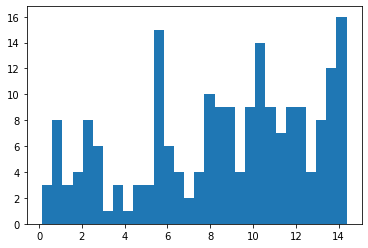

In [24]:
elec_x = electrodes.y
elec_y = electrodes.z
xx, yy = make_meshgrid(np.array(elec_x), np.array(elec_y))

dist, std = get_apic_dist_real(template_id, all_y, all_z, xx, yy, clf, verbose=True)

print(dist)
print(std)

/var/folders/df/rk7rf_5s4253kn_8sb19p5x80000gn/T/ipykernel_55556/1623050749.py:39: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax.plot([xlim, xlim, -xlim, -xlim], [ylim, -ylim, ylim, -ylim], '.', marker='o', markersize=1, color='blue')


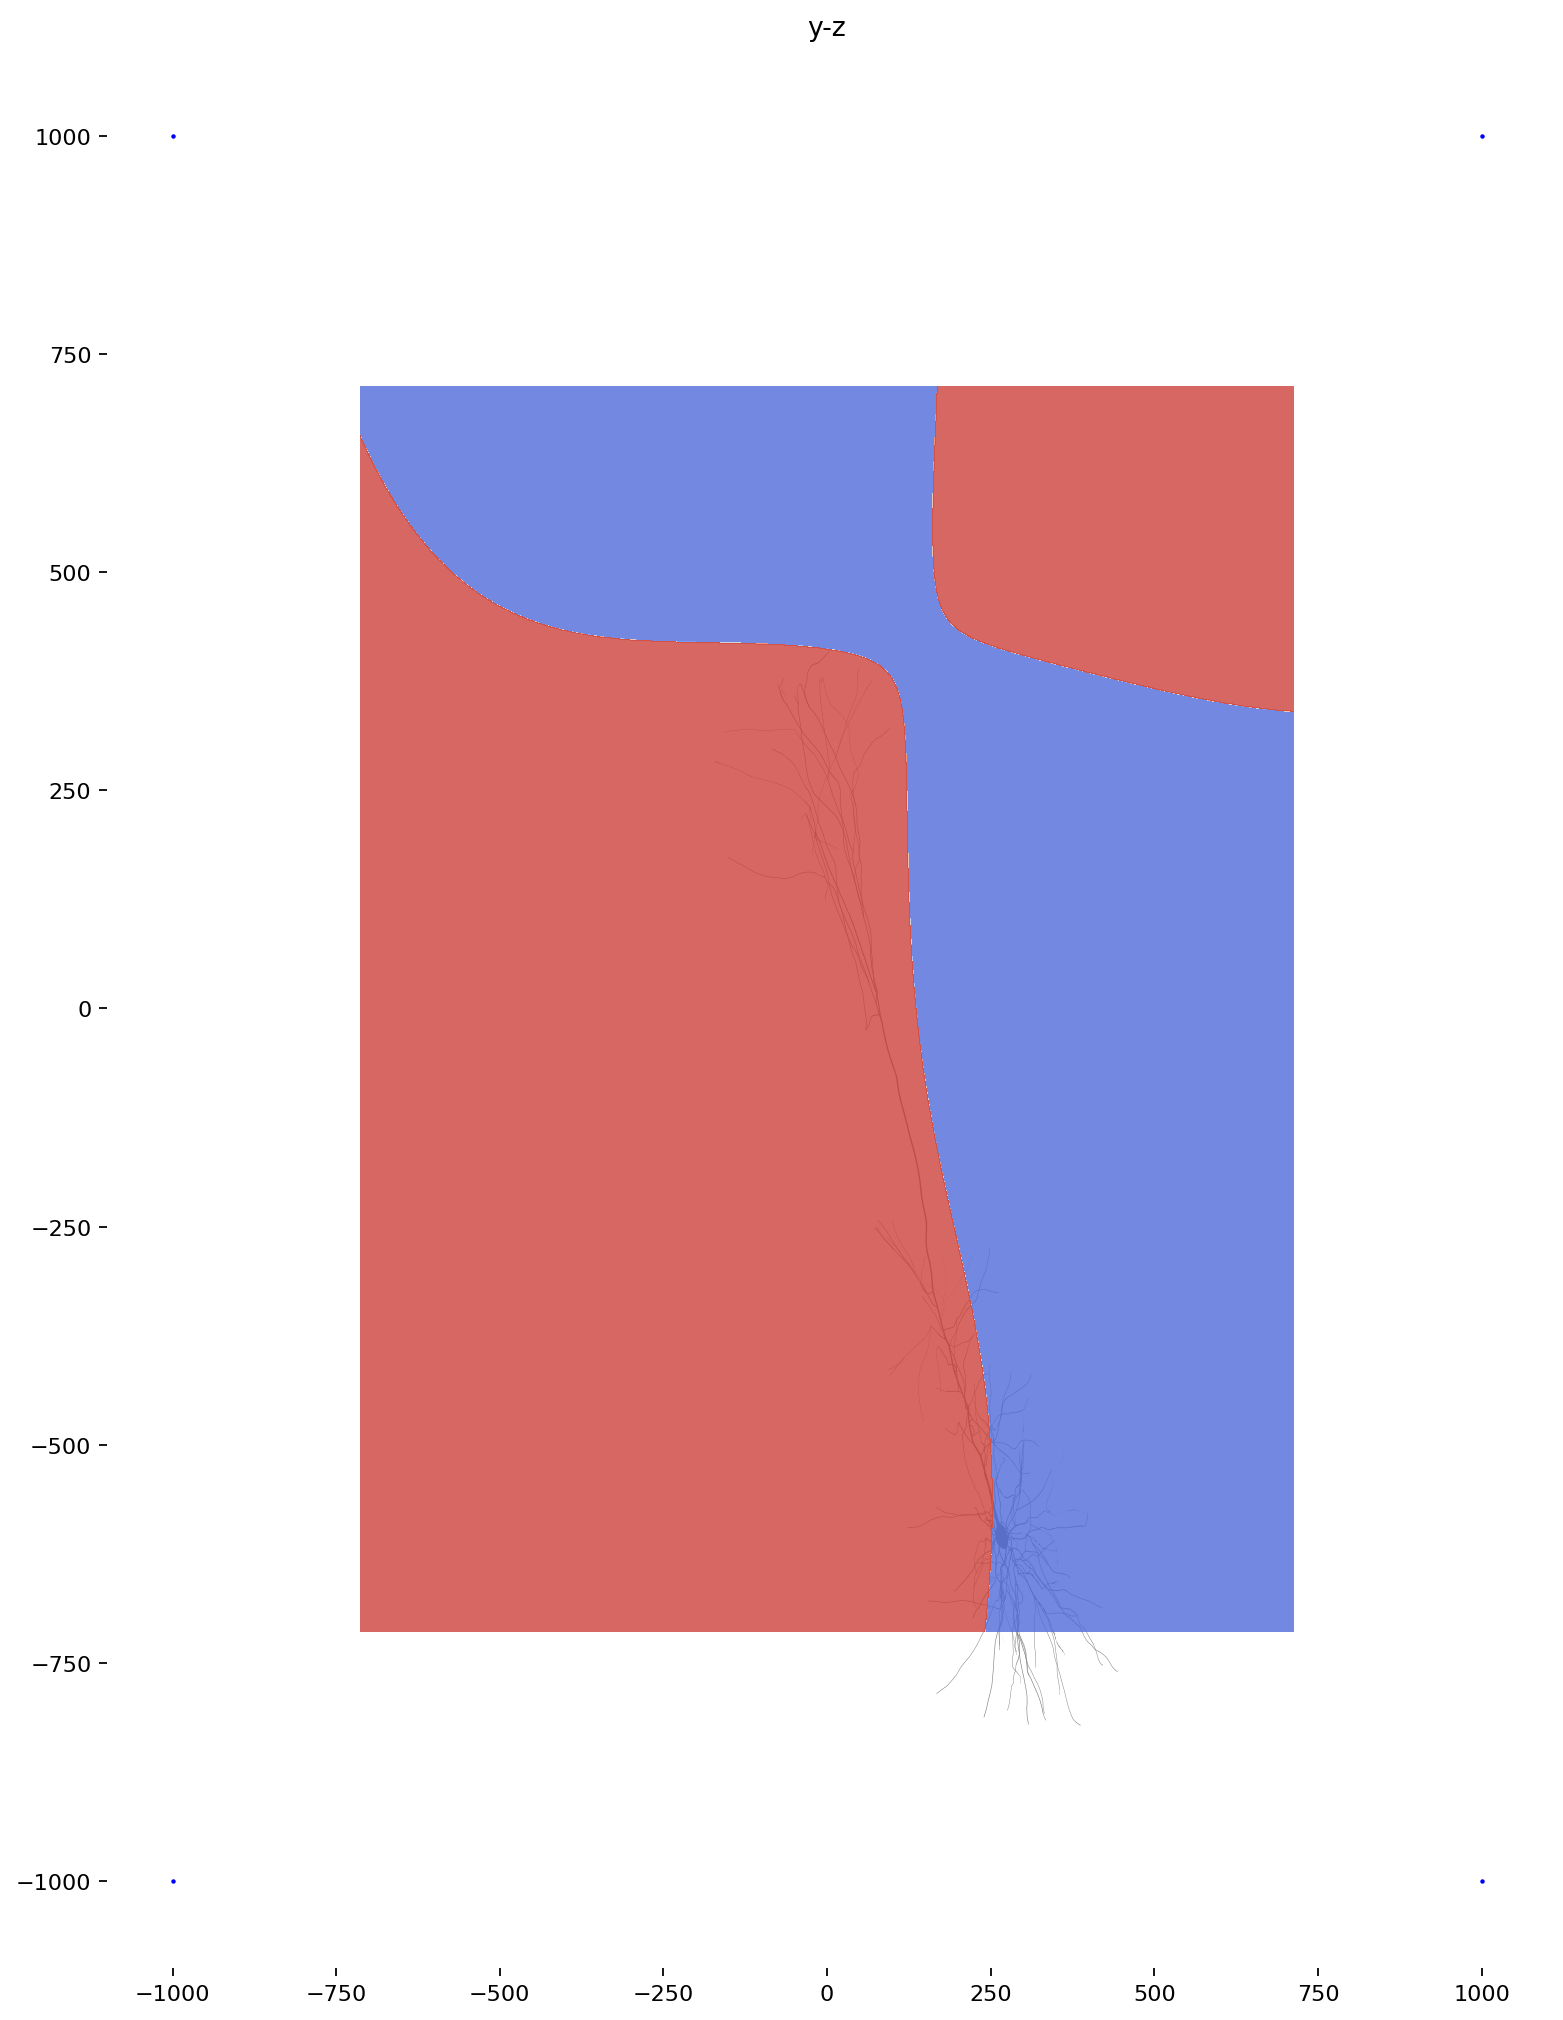

In [49]:
#elec_x = electrodes.y
#elec_y = electrodes.z
#xx, yy = make_meshgrid(np.array(elec_x), np.array(elec_y))
#boundary = get_boundary_coords(xx, yy, clf)

fig, ax = plotcell_1plane(cell, 1000, 1000)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
#plt.scatter(boundary[:, 0], boundary[:, 1], s=1, color='green')

In [50]:
# Run for all cells

# Load template
mea_name = '400MEA75'
templates_file = f'ziad_mearec_templates/mag_templates_flattened_morphology_L5_TTPC1_cADpyr232_1_n300_{mea_name}.h5'
tempgen = mr.tools.load_templates(templates_file, verbose=False)

with open(f'mag_templates_flattened_morphology_L5_TTPC1_cADpyr232_1_n300_{mea_name}.npy', 'rb') as f:
    all_y = np.load(f)
    all_z = np.load(f)
    mags = np.load(f)
    
    
# Main loop
thresh = 0.005
snr = 0

electrodes = get_electrodes(mea_name)
elec_x = electrodes.y
elec_y = electrodes.z
xx, yy = make_meshgrid(np.array(elec_x), np.array(elec_y))

dists = []
dists_std = []
for template_id in range(50):
    elecs = get_electrodes(mea_name)

    cell = load_cell(template_id, tempgen)
    noise = generate_noise(snr, mags[template_id], np.shape(mags[template_id]))
    coords, targets = get_strong_signals(mags[template_id] + noise, elecs, thresh)
    
    model = svm.SVC(kernel="rbf")
    clf = model.fit(coords, targets)
    
    boundary = get_boundary_coords(xx, yy, clf)
    if len(boundary) != 0:
        dist, std = get_apic_dist_real(template_id, all_y, all_z, xx, yy, clf, boundary = boundary)
    
    else:
        dist = 10000000
        std = 1000000
        
    print('Dist: ', dist)
    dists.append(dist)
    dists_std.append(std)

Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  14.17022005  266.86804268 -605.4864635 ]
Ziad Faltten Rotation:  [1.89961158 0.         0.        ]
SNR:  0.0
Dist:  136.41516191593792
Mechanisms already lo

Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  10.19880134 -573.87694214 -571.33876638]
Ziad Faltten Rotation:  [1.54698976 0.         0.        ]
SNR:  0.0
Dist:  336.8091301439514
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:

Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  10.13951573 -321.75392319  141.44778492]
Ziad Faltten Rotation:  [5.9628454 0.        0.       ]
SNR:  0.0
Dist:  63.93247120327122
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [

Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  15.68857991  -41.53390956 -190.54306024]
Ziad Faltten Rotation:  [0.42857198 0.         0.        ]
SNR:  0.0
Dist:  108.78674947168453
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position

Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  15.26425934 -441.5879524  -174.77711165]
Ziad Faltten Rotation:  [0.16473612 0.         0.        ]
SNR:  0.0
Dist:  58.818039934425954
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position

In [52]:
len(dists)

50

In [53]:
total = 0
count = 0
for dist in dists:
    if dist < 100000:
        total += dist
        count += 1
        
print(total/count)

159.23699615086124


In [14]:
for i in range(len(dists)):
    print(dists[i], '\t', dists_std[i])

149.05049935611956 	 54.70947919009237
107.02852760279914 	 65.39800278592362
11.734700246671045 	 5.266013869522345
68.68404271481843 	 48.22908792555632
36.334991777691 	 37.47924460178877
32.51153357311876 	 15.97986322465421
115.91480585913534 	 42.9018717939901
392.16076573113895 	 81.28550453842722
66.09089449603823 	 47.439790139469984
27.648979157870446 	 9.912280222089011
214.54053604839663 	 80.83947541929196
97.07519935110587 	 47.01337002242221
280.0359181936321 	 11.298332637456829
270.49563104240906 	 62.123384547150636
40.8146067423243 	 28.746467060639354
900.3627088250482 	 162.72031904352448
752.1204206818877 	 83.31195720378126
167.7111056046499 	 94.36002878293095
47.53249032586229 	 40.6158314657677
26.42900697669142 	 17.020593823558613
112.16219352406725 	 73.04666387966886
252.46422254048917 	 157.07883835474013
35.3077657059284 	 20.29229631142541
65.93550936799049 	 43.23858562509575
87.14105465151884 	 49.146113691544784
240.41956666610525 	 71.3038938024476


29.33477251022797

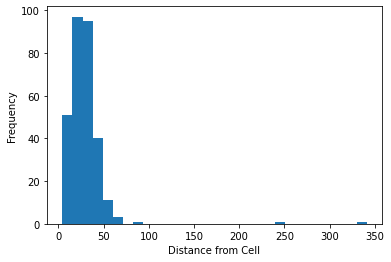

In [56]:
plt.hist(dists, bins=30)
plt.xlabel("Distance from Cell")
plt.ylabel("Frequency")
np.mean(dists)

In [53]:
np.shape(mags)

(300, 400, 224)

/var/folders/df/rk7rf_5s4253kn_8sb19p5x80000gn/T/ipykernel_21030/2804746349.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.plot(electrodes.y, electrodes.z, '.', marker='o', markersize=3, color='k', zorder=0)
/var/folders/df/rk7rf_5s4253kn_8sb19p5x80000gn/T/ipykernel_21030/2804746349.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.plot(electrodes.y, electrodes.z, '.', marker='o', markersize=3, color='k', zorder=0)
/var/folders/df/rk7rf_5s4253kn_8sb19p5x80000gn/T/ipykernel_21030/2804746349.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.plot(electrodes.y, electrodes.z, '.', marker='o', markersize=3, color='k', zorder=0)
/var

Real morph
Real morph
Real morph
Real morph


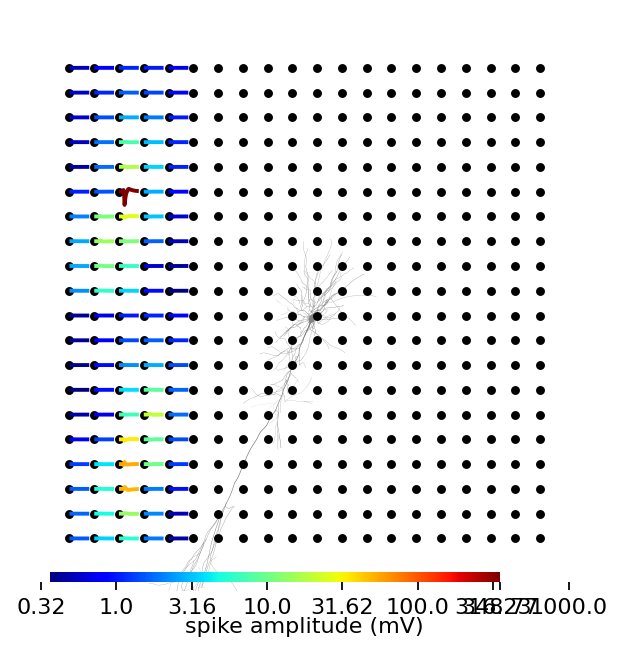

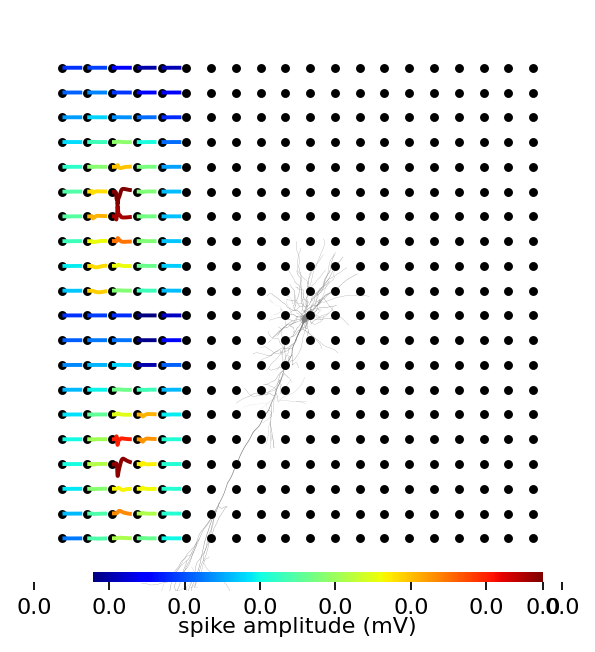

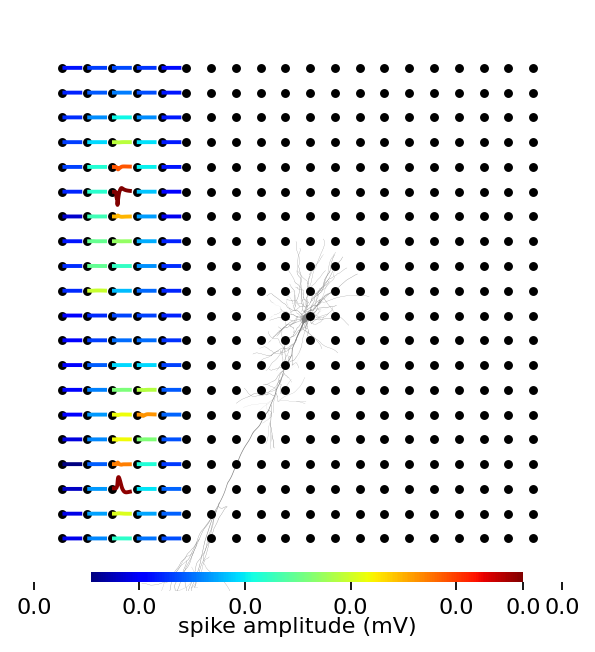

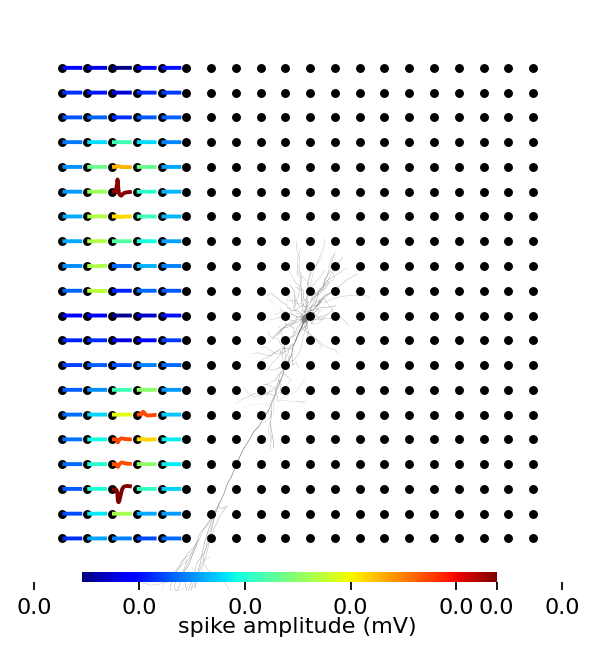

In [212]:
fig = plotstuff2(cell, t, tempgen.templates[template_id], electrodes, 0, False, real_morph, scale_mult, time_scale)
fig = plotstuff2(cell, t, tempgen.mags[template_id, :, 0, :], electrodes, 0, False, real_morph, scale_mult, time_scale)
fig = plotstuff2(cell, t, tempgen.mags[template_id, :, 1, :], electrodes, 0, False, real_morph, scale_mult, time_scale)
fig = plotstuff2(cell, t, tempgen.mags[template_id, :, 2, :], electrodes, 0, False, real_morph, scale_mult, time_scale)


In [127]:
ycoords = []
zcoords = []
names = []

for sec in cell.allseclist:
    if 'apic' in sec.name():
        print(sec.name())
        tempy = []
        tempz = []
        for n in range(sec.n3d()):
            print("   ", sec.y3d(n), sec.z3d(n))
            tempy.append(sec.y3d(n))
            tempz.append(sec.z3d(n))
        ycoords.append(tempy)
        zcoords.append(tempz)
        names.append(sec.name())

cADpyr232_L5_TTPC1_0fb1ca4724[2].apic[0]
    122.44598388671875 -276.458251953125
    120.61051940917969 -271.6667785644531
    119.53350830078125 -268.51025390625
    118.44274139404297 -265.31341552734375
    117.55119323730469 -262.700439453125
    116.5698013305664 -259.82415771484375
    115.1013412475586 -255.52037048339844
    113.4284439086914 -250.61741638183594
    112.47392272949219 -247.81988525390625
cADpyr232_L5_TTPC1_0fb1ca4724[2].apic[1]
    112.47392272949219 -247.81988525390625
    112.27882385253906 -246.69195556640625
    111.24457550048828 -242.80604553222656
    110.08735656738281 -239.20216369628906
    109.07502746582031 -236.04946899414062
    108.2330093383789 -233.42718505859375
    107.1615982055664 -230.0904998779297
    105.77043151855469 -226.09170532226562
    104.4549331665039 -222.93869018554688
cADpyr232_L5_TTPC1_0fb1ca4724[2].apic[2]
    104.4549331665039 -222.93869018554688
    104.1596908569336 -222.60379028320312
    103.68431854248047 -222.325073

    97.21553802490234 -164.58763122558594
    99.65386962890625 -166.7268524169922
    101.85908508300781 -168.68885803222656
    103.34850311279297 -170.02020263671875
    103.51913452148438 -170.17437744140625
    105.53546142578125 -171.91659545898438
    105.57481384277344 -171.9464874267578
    107.35948181152344 -173.20669555664062
    107.43827819824219 -173.26329040527344
    109.4646224975586 -174.92495727539062
    109.60687255859375 -175.05076599121094
    111.57259368896484 -177.0342559814453
    113.12165069580078 -178.5660858154297
    113.16773223876953 -178.6116485595703
    114.9122543334961 -180.26487731933594
    115.17186737060547 -180.49961853027344
    117.226806640625 -182.42095947265625
    119.24259948730469 -184.3211212158203
    119.27734375 -184.35110473632812
    121.43175506591797 -186.09048461914062
    121.48969268798828 -186.13116455078125
    123.95943450927734 -187.7390594482422
    124.14750671386719 -187.8480682373047
    126.2039794921875 -189.0192

    -144.9779815673828 473.2009582519531
    -145.6322021484375 475.11834716796875
    -148.9596710205078 480.719970703125
    -151.78790283203125 485.0158386230469
    -153.5208740234375 488.62664794921875
    -156.34654235839844 493.8077392578125
    -158.87095642089844 499.7964172363281
    -160.66737365722656 506.6103515625
    -162.4195556640625 511.4307861328125
    -163.2357177734375 515.5953369140625
    -164.80690002441406 520.7607421875
    -166.63719177246094 526.8372192382812
    -168.85186767578125 533.883544921875
    -172.2822265625 540.4485473632812
cADpyr232_L5_TTPC1_0fb1ca4724[2].apic[75]
    -140.5426788330078 463.175048828125
    -140.42739868164062 462.8371887207031
    -140.3033905029297 462.4737243652344
    -140.19326782226562 462.1510009765625
    -139.99952697753906 461.5831604003906
    -139.84678649902344 461.1354675292969
    -139.913818359375 458.5028076171875
    -140.02244567871094 457.7314147949219
    -139.3507537841797 455.60113525390625
    -140.1838

    -198.72166442871094 662.6124877929688
    -198.7339630126953 662.6294555664062
    -200.7877197265625 665.193603515625
    -202.01205444335938 666.6248779296875
    -203.76783752441406 668.5617065429688
    -205.53868103027344 670.3560180664062
    -205.55441284179688 670.3717651367188
    -206.77723693847656 671.4232177734375
cADpyr232_L5_TTPC1_0fb1ca4724[2].apic[88]
    -206.77723693847656 671.4232177734375
    -208.54666137695312 674.8663330078125
    -209.64935302734375 677.015380859375
    -211.408203125 680.4408569335938
    -212.31793212890625 682.2119140625
    -213.77674865722656 685.05322265625
cADpyr232_L5_TTPC1_0fb1ca4724[2].apic[89]
    -213.77674865722656 685.05322265625
    -212.28428649902344 687.770751953125
    -210.95957946777344 689.8076171875
    -210.9439239501953 689.8341064453125
    -209.45875549316406 692.1159057617188
    -208.03146362304688 694.3041381835938
    -206.7814178466797 696.23095703125
    -206.64186096191406 696.4053955078125
cADpyr232_L5_TTP

In [120]:
dir(tempgen)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_verbose',
 'celltypes',
 'generate_templates',
 'info',
 'locations',
 'mags',
 'params',
 'rotations',
 'templates']

In [129]:
len(tempgen.locations)

600

In [35]:
electrodes.y

array([-337.5, -337.5, -337.5, -337.5, -337.5, -337.5, -337.5, -337.5,
       -337.5, -337.5, -262.5, -262.5, -262.5, -262.5, -262.5, -262.5,
       -262.5, -262.5, -262.5, -262.5, -187.5, -187.5, -187.5, -187.5,
       -187.5, -187.5, -187.5, -187.5, -187.5, -187.5, -112.5, -112.5,
       -112.5, -112.5, -112.5, -112.5, -112.5, -112.5, -112.5, -112.5,
        -37.5,  -37.5,  -37.5,  -37.5,  -37.5,  -37.5,  -37.5,  -37.5,
        -37.5,  -37.5,   37.5,   37.5,   37.5,   37.5,   37.5,   37.5,
         37.5,   37.5,   37.5,   37.5,  112.5,  112.5,  112.5,  112.5,
        112.5,  112.5,  112.5,  112.5,  112.5,  112.5,  187.5,  187.5,
        187.5,  187.5,  187.5,  187.5,  187.5,  187.5,  187.5,  187.5,
        262.5,  262.5,  262.5,  262.5,  262.5,  262.5,  262.5,  262.5,
        262.5,  262.5,  337.5,  337.5,  337.5,  337.5,  337.5,  337.5,
        337.5,  337.5,  337.5,  337.5])

In [36]:
np.shape(mags)

(300, 100, 224)

In [104]:
coords = np.zeros((2, np.shape(all_y)[1]))
coords[0] = all_y[0]
coords[1] = all_z[0]
clf.decision_function(coords.T)

array([ 1.54368809,  1.53705797,  1.53027931,  1.52335275,  1.51627935,
        1.50905991,  1.50169518,  1.49418615,  1.48653376,  1.47873899,
        1.4708029 ,  1.46272647,  1.4545108 ,  1.44615706,  1.43766632,
        1.4290398 ,  1.42027875,  1.41138433,  1.40235791,  1.39320072,
        1.38391414,  1.40437219,  1.37098303,  1.34866107,  1.3253843 ,
        1.3058719 ,  1.28390134,  1.25009723,  1.21029192,  1.18699284,
        1.18699284,  1.1783017 ,  1.1463134 ,  1.11514727,  1.08740194,
        1.06400182,  1.03382839,  0.99665804,  0.96601857,  0.96601857,
        0.93561289,  0.91718308,  0.89204719,  0.85849919,  0.83488583,
        0.82540919,  0.82540919,  0.80396532,  0.76516762,  0.72884295,
        0.70220623,  0.68028821,  0.68028821,  0.67488656,  0.64526963,
        0.61838796,  0.58650057,  0.55591075,  0.52707262,  0.50740195,
        0.50740195,  0.49771449,  0.4612454 ,  0.41441082,  0.36863327,
        0.33403743,  0.29429474,  0.29186009,  0.26278979,  0.23

In [102]:
np.shape(all_y)

(300, 203)

In [137]:
a = distance.cdist(np.array([[5, 4], [3, 2]]), np.array([[2, 1], [7, -4]]), 'euclidean')
print(a)

[[4.24264069 8.24621125]
 [1.41421356 7.21110255]]


In [132]:
np.linalg.norm([-2, 8])

8.246211251235321

In [138]:
np.min(a, axis=1)

array([4.24264069, 1.41421356])

In [29]:
a = np.random.normal(size=(4, 12))
print(a)
print(np.sum(a**2))

[[-1.87246997  0.07946121 -0.0483342  -1.79496809 -1.02137469  1.38843632
   1.40356813 -0.25396024  0.84359924  0.56870597 -1.17622818 -0.27345609]
 [ 0.52735097  0.39042616  0.13033959  0.19981532 -0.48311875  0.54728143
   0.36900507  1.2770285   0.37082864  0.16772016 -0.33940244  0.80476943]
 [ 0.82771938  0.91956475 -1.26963363  0.58164068  0.13897755  1.9008353
  -0.02480526  0.14583166  0.2319272   1.57215669  0.02814102 -0.17283715]
 [ 1.849542   -1.4240458   0.75765999  1.21570875 -0.35617465  0.5882353
  -1.98302128 -1.46955427  0.18154322  0.61305674  0.44212396  0.87619922]]
43.08041309763577


In [32]:
generate_noise(30, mags[0], np.shape(mags[0]))

SNR:  30.0
